In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import cv2
from rembg import remove


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
# Set the path to the destination directory
dest_dir = '../data/joined_dataset'

# Initialize a counter for directories with exactly one image
single_image_dirs_count = 0

# List all subdirectories in the destination directory
for subdir in os.listdir(dest_dir):
    subdir_path = os.path.join(dest_dir, subdir)
    if os.path.isdir(subdir_path):  # Ensure it's a directory
        # Get a list of files in the subdirectory
        files = [file for file in os.listdir(subdir_path) if file.lower().endswith('.jpg')]
        # Check if there is exactly one image file
        if len(files) == 1:
            single_image_dirs_count += 1
            print(f"Directory {subdir} has exactly one image.")

# Print the count of directories with exactly one image
print(f"There are {single_image_dirs_count} directories with exactly one image.")


Directory CUL48_Right has exactly one image.
Directory CUL170_right has exactly one image.
Directory CUL153_left has exactly one image.
Directory MML120_Left has exactly one image.
Directory CUL209_right has exactly one image.
Directory DHL07_Left has exactly one image.
Directory CUL145_Left has exactly one image.
Directory BHA53_Right has exactly one image.
Directory CUL75_Right has exactly one image.
Directory BRL36_Right has exactly one image.
Directory CUL30_Right has exactly one image.
Directory CUL88_Right has exactly one image.
Directory BKL10_Left has exactly one image.
Directory MML167_Right has exactly one image.
Directory MML122_Right has exactly one image.
Directory CUL194_right has exactly one image.
Directory CUL76_Left has exactly one image.
Directory MML43_Right has exactly one image.
Directory BRL57_Right has exactly one image.
Directory CUL201_left has exactly one image.
Directory CUL91_Right has exactly one image.
Directory VS203_Right has exactly one image.
Director

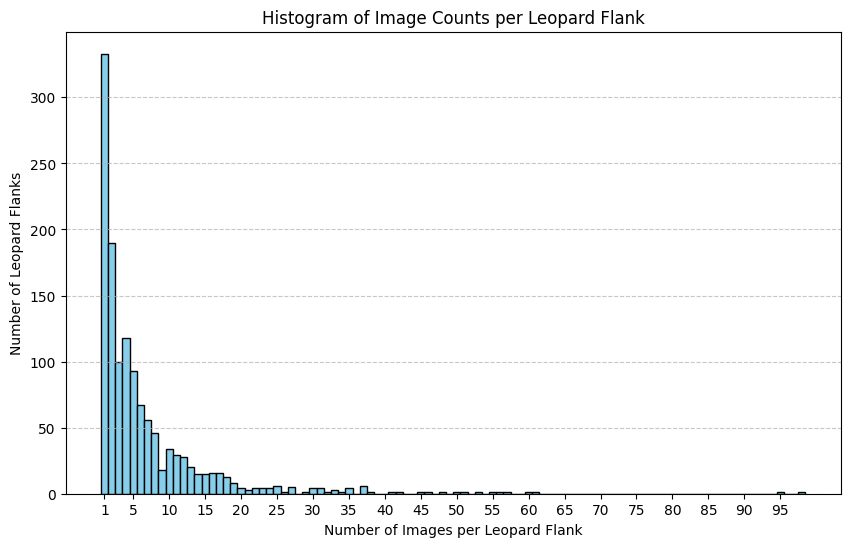

In [19]:
image_counts = []
# List all subdirectories in the destination directory
for subdir in os.listdir(dest_dir):
    subdir_path = os.path.join(dest_dir, subdir)
    if os.path.isdir(subdir_path):  # Ensure it's a directory
        # Get a list of image files in the subdirectory
        files = [file for file in os.listdir(subdir_path) if file.lower().endswith('.jpg')]
        image_counts.append(len(files))

plt.figure(figsize=(10, 6))  # Set the figure size
# Create histogram with specified bins and alignment
plt.hist(image_counts, bins=range(min(image_counts), max(image_counts) + 2), align='left', color='skyblue', edgecolor='black')
plt.title('Histogram of Image Counts per Leopard Flank')
plt.xlabel('Number of Images per Leopard Flank')
plt.ylabel('Number of Leopard Flanks')

# Generate ticks: Include 0, 1 and every multiple of 5
ticks = set(x for x in range(min(image_counts), max(image_counts) + 1) if x % 5 == 0)
ticks.update([1])  # Explicitly add 0 and 1 to ensure they are included
plt.xticks(sorted(ticks))  # Sort the ticks to maintain order on the axis

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Convert image_counts to a NumPy array for better performance on operations
image_counts = np.array(image_counts)

# Calculate total number of directories
total_directories = len(image_counts)

# Calculate total number of images
total_images = np.sum(image_counts)

# Calculate the mean number of images per directory
mean_images = np.mean(image_counts)

# Calculate the median number of images per directory
median_images = np.median(image_counts)

# Print the results
print(f"Total number of directories: {total_directories}")
print(f"Total number of images: {total_images}")
print(f"Mean number of images per directory: {mean_images:.2f}")
print(f"Median number of images per directory: {median_images}")


Total number of directories: 1286
Total number of images: 8304
Mean number of images per directory: 6.46
Median number of images per directory: 4.0


Average Height: 509.4401091081594
Average Width: 1074.4357210626185
Average Aspect Ratio: 2.2139920502961306


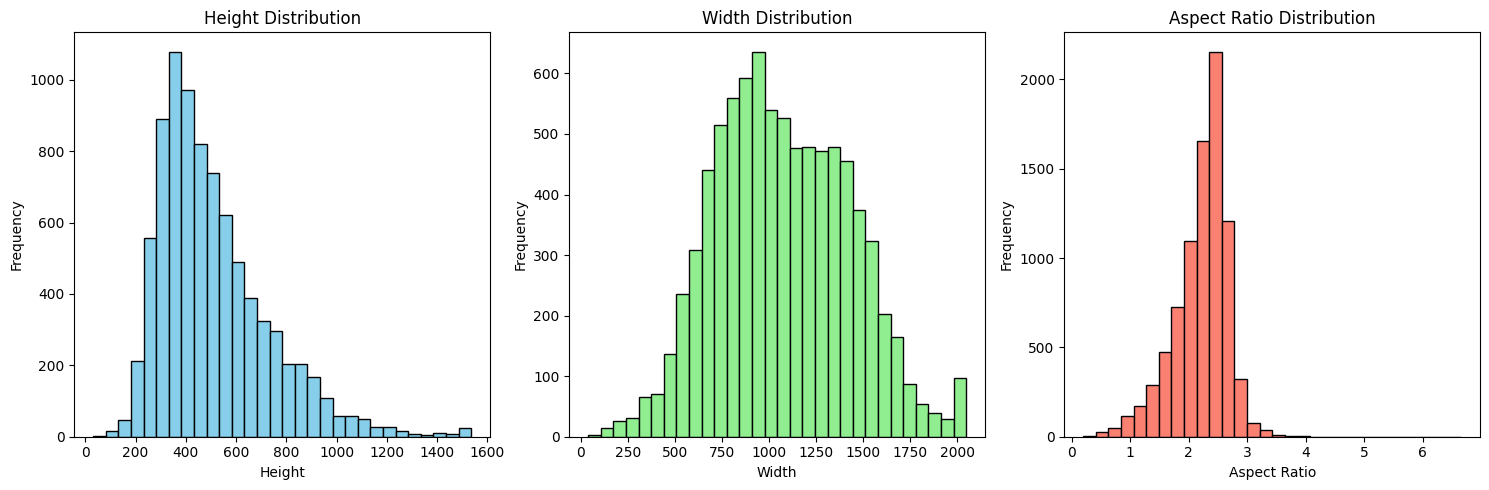

In [3]:
# Directory containing subdirectories of images
root_dir = '../data/crop_output'

# Initialize lists to store image dimensions
heights = []
widths = []
aspect_ratios = []

# Traverse the directory and gather image information
for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg'):
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    heights.append(height)
                    widths.append(width)
                    aspect_ratios.append(width / height)
            except Exception as e:
                print(f"Error processing image {file_path}: {e}")

# Convert lists to numpy arrays for easier analysis
heights = np.array(heights)
widths = np.array(widths)
aspect_ratios = np.array(aspect_ratios)

# Calculate average height, width, and aspect ratio
average_height = np.mean(heights)
average_width = np.mean(widths)
average_aspect_ratio = np.mean(aspect_ratios)

print(f"Average Height: {average_height}")
print(f"Average Width: {average_width}")
print(f"Average Aspect Ratio: {average_aspect_ratio}")

# Plot histograms for height, width, and aspect ratio
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(heights, bins=30, color='skyblue', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(widths, bins=30, color='lightgreen', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(aspect_ratios, bins=30, color='salmon', edgecolor='black')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [3]:
def remove_background(input_path, output_path):
    """
    Removes the background from an image using the rembg package.

    Parameters:
        input_path (str): The path to the input image file.
        output_path (str): The path to save the output image file with the background removed.

    Returns:
        None
    """
    # Read the image
    with open(input_path, 'rb') as f:
        input_image = f.read()

    # Remove the background
    output_image = remove(input_image)

    # Save the result
    with open(output_path, 'wb') as out:
        out.write(output_image)

# Example usage
image_path = '../data/crop_output/BGL01_right/0_0_BG-01B-2019-02-05_05-10-40.jpg'
output_path = 'test.jpg'
remove_background(image_path, output_path)


NameError: name 'rembg' is not defined